In [2]:
import numpy as np
import dataset as d
import pandas as pd

In [13]:
sum = 0
n = 50000
lambd=0.1
for i in range(n):
    sum += float(np.random.exponential(1/lambd, 1))
print (sum/n)

9.986218332725327


In [4]:
d.generate_dataset(20, 3,"index_experiment_8_cluster.csv")


,id_patient,aux_encode
0,0,"0.A,45.16.B"
1,1,"0.A,181.21.B"
2,2,"0.A,27.16.B"
3,3,"0.A,11.94.B"
4,4,"0.A,66.47.B"
...,...,...
155,155,"0.A,24.67.C"
156,156,"0.A,208.9.C"
157,157,"0.A,187.71.C"
158,158,"0.A,63.15.C"


In [11]:
df = pd.read_csv("times_bootstrap_samples_parallel.csv", sep=';')
#print(df)
rows = len(df.index)
tempMeans = []
tempStd = []
for column in df.columns:
    tempMeans.append(df[column].mean())
    tempStd.append(df[column].std())
df.loc[len(df)] = tempMeans
df.loc[len(df)] = tempStd
print(df.round(2))
df.index = ["", "", "", "", "", "Mean", "Standard deviation"]
df.round(2).to_csv("times_bootstrap_samples_parallel.csv", sep=';')
print(df.round(2).to_latex(bold_rows=True, position='c'))

\begin{table}[c]
\centering
\begin{tabular}{llrrrrr}
\toprule
{} &          Unnamed: 0 &     125 &     250 &      350 &      500 &     650 \\
\midrule
\textbf{0} &                 NaN &  331.00 &  802.00 &  1244.00 &  1178.00 &  1886.0 \\
\textbf{1} &                 NaN &  325.00 &  614.00 &   872.00 &  1181.00 &  1755.0 \\
\textbf{2} &                 NaN &  332.00 &  617.00 &   868.00 &  1388.00 &  1685.0 \\
\textbf{3} &                 NaN &  482.00 &  608.00 &   862.00 &  1307.00 &  1744.0 \\
\textbf{4} &                 NaN &  476.00 &  618.00 &   866.00 &  1661.00 &  1616.0 \\
\textbf{5} &                Mean &  389.20 &  651.80 &   942.40 &  1343.00 &  1737.2 \\
\textbf{6} &  Standard deviation &   82.05 &   84.05 &   168.64 &   198.69 &    99.9 \\
\bottomrule
\end{tabular}
\end{table}



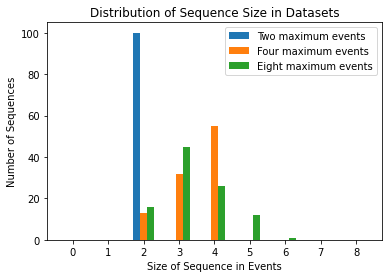

In [23]:
import matplotlib.pyplot as plt  
  
df = pd.read_csv("n_events/time_experiment_2_events.csv", sep=',')
no_sequences0 = [0]*9
for patient in df['aux_encode']:
    no_sequences0[len(patient.split(','))] += 1

df = pd.read_csv("n_max_events/time_experiment_4_max_events.csv", sep=',')
no_sequences1 = [0]*9
for patient in df['aux_encode']:
    no_sequences1[len(patient.split(','))] += 1

df = pd.read_csv("n_max_events/time_experiment_8_max_events.csv", sep=',')
no_sequences2 = [0]*9
for patient in df['aux_encode']:
    no_sequences2[len(patient.split(','))] += 1

X = list(range(9))
Y2seq = no_sequences0
Y4seq = no_sequences1
Y8seq = no_sequences2
X_axis = np.arange(len(X)) 
  
plt.bar(X_axis - 0.2, Y2seq, 0.2, label = 'Two maximum events') 
plt.bar(X_axis, Y4seq, 0.2, label = 'Four maximum events') 
plt.bar(X_axis + 0.2, Y8seq, 0.2, label = 'Eight maximum events') 
  
plt.xticks(X_axis, X) 
plt.xlabel("Size of Sequence in Events") 
plt.ylabel("Number of Sequences") 
plt.title("Distribution of Sequence Size in Datasets") 
plt.legend() 
plt.show()

In [1]:
from multiprocessing import Pool
import time
import math

N = 5

def cube(x):
    return math.sqrt(x)

if __name__ == "__main__":
    pool = Pool()
    print("Program a!")
    result = pool.map(cube, range(2,N))
    print(result)
    pool.join()
    print("Program finished!")

Program a!


In [29]:
import numpy as np
from statistics import mean
import pandas as pd

def cluster_internal_indices(partition, distance_matrix, patients_id):
    print(partition)
   
    sum_within_cluster = 0
    sum_between_cluster = 0
    total_distances_within = 0
    term = []
    max_cluster_diameter = 0
    for cluster in partition:
        print(cluster)
        dist_within_cluster = []
        dist_between_cluster = []
        if len(cluster) != 1:
            for pat1, pat2 in zip(distance_matrix['patient1'], distance_matrix['patient2']):
                #print('pats', pat1, pat2)

                pair_distance = distance_matrix.loc[(distance_matrix['patient1'] == pat1) &
                                                                (distance_matrix['patient2'] == pat2)]['score']
                if pair_distance is None or len(pair_distance) == 0:
                    pair_distance = distance_matrix.loc[(distance_matrix['patient1'] == pat2) &
                                                                (distance_matrix['patient2'] == pat1)]['score']
                pair_distance = float(pair_distance)
                #print(pair_distance)
                if all(dupla in cluster for dupla in [pat1, pat2]):
                    #print("both")
                    dist_within_cluster.append(pair_distance)
                if pat1 in cluster and pat2 not in cluster:
                   # print("soh primeiro")
                    dist_between_cluster.append(pair_distance)
                if pat1 not in cluster and pat2 in cluster:
                    #print("soh segundo")
                    dist_between_cluster.append(pair_distance)
            
            number_distances_within = int(len(cluster) * (len(cluster) - 1)/2)
            total_distances_within += number_distances_within

            number_distances_between = len(cluster) * (len(patients_id) - len(cluster))
            #print('vamos verificar', number_distances_between, len(dist_between_cluster), number_distances_within, len(dist_within_cluster))
            sum_between_cluster += sum(dist_between_cluster)
            sum_within_cluster += sum(dist_within_cluster)
            if max(dist_within_cluster) > max_cluster_diameter:
                max_cluster_diameter = max(dist_within_cluster)
            #print("c",cluster, number_distances_within, dist_between_cluster, sum_between_cluster, flush=True)
            term.append((number_distances_between * sum(dist_within_cluster))/(number_distances_within * sum(dist_between_cluster)))

    #McClain
    total_distances = len(distance_matrix)
    number_distances_between = total_distances - total_distances_within
    if(total_distances_within == 0 or sum_between_cluster == 0):
        mcclainN = 10
    else:
        mcclainN = (number_distances_between * sum_within_cluster)/(total_distances_within * sum_between_cluster)
    print("mcclain novo", mcclainN)

    mcclainV = float(sum(term)/len(partition))
    print("mcclain velho", mcclainV)

    #C-index
    smin = sum(distance_matrix['score'].sort_values().head(total_distances_within))
    smax = sum(distance_matrix['score'].sort_values(ascending = False).head(total_distances_within))
    print(total_distances_within, sum_within_cluster, smin, smax, smin)
    cindex = (sum_within_cluster - smin)/(smax - smin)
    print("cindex", cindex)

    #Silhouette
    #criar matrix dij p resultados de distancias entre clusters
    # object_indices = pd.Dataframe(index = patients_id, columns = range(len(partition)))
    # object_indices.columns = [f"cluster{i+1}" for i in range(df.shape[1] - 2)]

    s_clusters = []
    s_general = []
    dist_i_j = [[10]*len(partition) for _ in range(len(partition))]

    for i, cluster_i in enumerate(partition):
        s_cluster_term = []
        for pat1 in cluster_i:
            object_to_cluster_mean_list = []
            for j, cluster_j in enumerate(partition):
                #silhouette
                if cluster_i == cluster_j:
                    if len(cluster_i) == 1:
                        continue
                    a = mean(object_to_cluster_distances(pat1, cluster_i, distance_matrix))
                    continue
                object_to_cluster_dist = object_to_cluster_distances(pat1, cluster_j, distance_matrix)
                object_to_cluster_mean_list.append(mean(object_to_cluster_dist))
                #dunn 
                if min(object_to_cluster_dist) < dist_i_j[i][j]:
                    dist_i_j[i][j] = min(object_to_cluster_dist)
            #silhouette
            if len(cluster_i) == 1:
                s_obj = 0
            else:
                b = min(object_to_cluster_mean_list)
                s_obj = (b - a)/max(a, b)
            print(pat1, a, b, s_obj)
            s_cluster_term.append(s_obj)
            s_general.append(s_obj)
        #silhouette
        s_cluster = mean(s_cluster_term)
        s_clusters.append(s_cluster)

    print('silhouettec', s_clusters)
    silhouette = mean(s_general)
    print('silhouette', silhouette)

    #dunn
    print(dist_i_j)
    min_dist_between = np.matrix(dist_i_j).min()
    dunn = min_dist_between/max_cluster_diameter
    print('dunn', dunn)


            
def object_to_cluster_distances(patient_i, cluster, distance_matrix):
    dist = []
    #print(patient_i, cluster)
    for patient in cluster:
        if patient == patient_i:
            continue
        #print(patient_i, patient)
        pair_distance = distance_matrix.loc[(distance_matrix['patient1'] == patient) &
                                                                (distance_matrix['patient2'] == patient_i)]['score']
        if pair_distance is None or len(pair_distance) == 0:
            pair_distance = distance_matrix.loc[(distance_matrix['patient1'] == patient_i) &
                                                        (distance_matrix['patient2'] == patient)]['score']
        pair_distance = float(pair_distance)
        #print(pair_distance)
        dist.append(pair_distance)
    #print(dist)
    return dist

if __name__ == "__main__":
    partition = ([1,3],[7,5],[2])
    distance_matrix = [[1,2,0.81],[1,3,0.11],[1,5,0.82],[1,7,0.91],[2,3,0.51],
                       [2,5,0.83],[2,7,0.5],[3,5,0.9],[3,7,0.8],[5,7,0.1]]
    distance_matrix = pd.DataFrame(distance_matrix, columns=['patient1', 'patient2', 'score'])
    id_patients = [1,2,3,5,7]

    cluster_internal_indices(partition,distance_matrix,id_patients)

([1, 3], [7, 5], [2])
[1, 3]
[7, 5]
[2]
mcclain novo 0.08832807570977919
mcclain velho 0.08833259619637329
2 0.21000000000000002 0.21000000000000002 1.81 0.21000000000000002
cindex 0.0
1 0.11 0.81 0.8641975308641976
3 0.11 0.51 0.7843137254901961
7 0.1 0.5 0.8
5 0.1 0.83 0.8795180722891567
2 0.1 0.66 0
silhouettec [0.8242556281771969, 0.8397590361445784, 0]
silhouette 0.66560586572871
[[6, 0.8, 0.51], [0.8, 6, 0.5], [0.51, 0.5, 6]]
dunn 4.545454545454546
